In [1]:
from pathlib import Path
import pandas as pd
import lc_reconstruction_analysis.utils as utils
import lc_reconstruction_analysis.dendritic as dendritic
import lc_reconstruction_analysis.clustering as clustering
import lc_reconstruction_analysis.axon as axon
%matplotlib inline

# Load Data

In [2]:
# Define path to data
DATA_DIR = Path("/data/")

In [3]:
# Load data frame of cells, and networkx graphs
dataDF, graphs = utils.load_cells(DATA_DIR)

Missing structure dendrite for /data/685221_12_5_24/Complete_annotated/N064-68221-JN.json
Missing structure dendrite for /data/685221_12_5_24/Complete_annotated/N025-685221-PG.json
Missing structure dendrite for /data/685221_12_5_24/Complete_annotated/N051-685221 -YP.json
Missing structure axon for /data/685221_12_5_24/Complete_annotated/N064-685221-JN.json
Error finding structures for: N025-685221-PG, dropping from dataframe
Error finding structures for: N064-68221-JN, dropping from dataframe
Error finding structures for: N051-685221 -YP, dropping from dataframe
Error finding structures for: N064-685221-JN, dropping from dataframe


# Perform Sholl Analysis on dendrites

In [4]:
sholl_df = dendritic.build_sholl_df(dataDF, graphs)

In [5]:
# Run bootstrapping over subjects and cells hierarchically
bootstraps, summary = dendritic.bootstrap_sholl_hierarchically(sholl_df, nboots=1000)

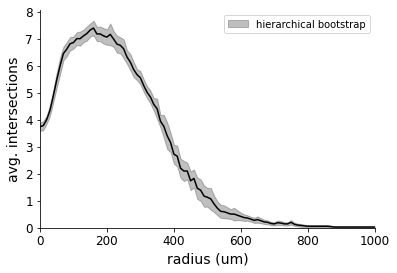

In [6]:
dendritic.plot_sholl(sholl_df, error="hierarchical bootstrap", bootstraps=summary)

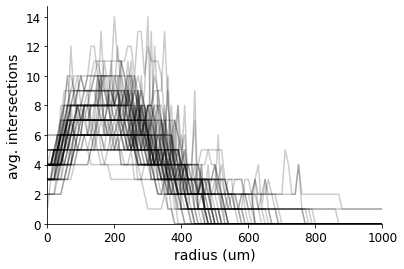

In [7]:
dendritic.plot_individual_sholl(sholl_df)

# Cluster cells based on normalized projections

In [8]:
dfLengths = clustering.build_length_df(dataDF, graphs, DATA_DIR)  # very slow

In [9]:
plotDF, sorted_columns = clustering.cluster_kmeans(dataDF, dfLengths)

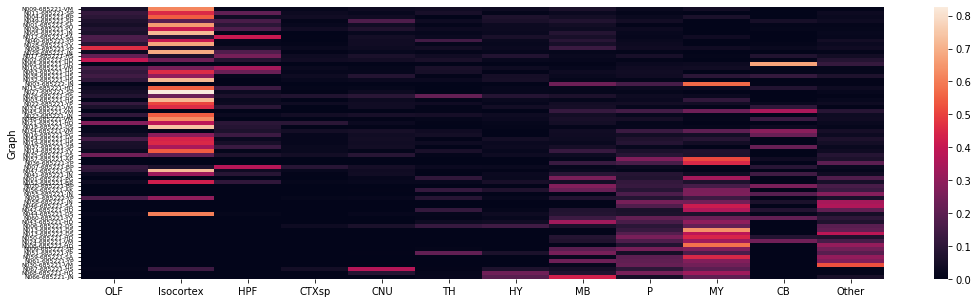

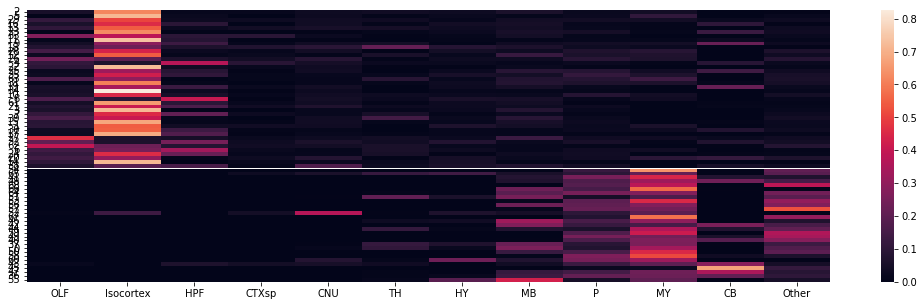

In [10]:
clustering.plot_clustering(plotDF, sorted_columns)

# Add cluster labels to Sholl analysis and visualize

In [11]:
# Add cluster labels
sholl_df = pd.merge(
    sholl_df,
    plotDF[["Graph", "cluster"]],
    left_on="name",
    right_on="Graph",
    how="left",
)

In [12]:
bootstraps, summary = dendritic.bootstrap_groups(
    sholl_df, "cluster", 1000
    )

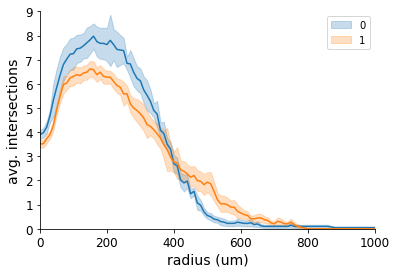

In [13]:
dendritic.plot_sholl_groups(
    sholl_df,
    "cluster",
    error="hierarchical bootstrap",
    bootstraps=summary,
    )

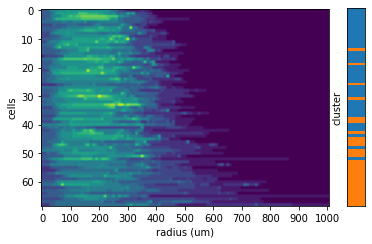

In [14]:
df = dendritic.plot_heatmap_with_column(plotDF, sholl_df, col="cluster")

# Run Sholl analysis on axons

In [15]:
axon_sholl_df = dendritic.build_sholl_df(dataDF, graphs,analysis_type='axon')

In [16]:
# Run bootstrapping over subjects and cells hierarchically
axon_bootstraps, axon_summary = dendritic.bootstrap_sholl_hierarchically(axon_sholl_df, nboots=1000)

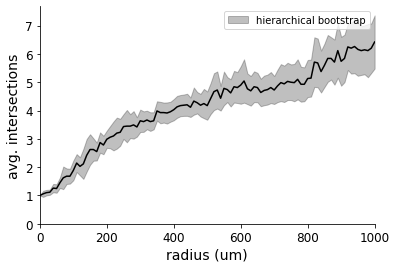

In [17]:
dendritic.plot_sholl(axon_sholl_df, error="hierarchical bootstrap", bootstraps=axon_summary)

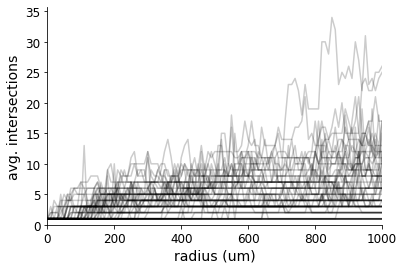

In [18]:
dendritic.plot_individual_sholl(axon_sholl_df)

In [19]:
# Add cluster labels
axon_sholl_df = pd.merge(
    axon_sholl_df,
    plotDF[["Graph", "cluster"]],
    left_on="name",
    right_on="Graph",
    how="left",
)

In [20]:
axon_bootstraps, axon_summary = dendritic.bootstrap_groups(
    axon_sholl_df, "cluster", 1000
    )

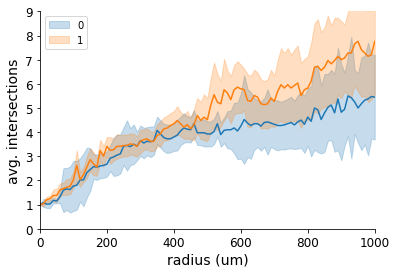

In [21]:
dendritic.plot_sholl_groups(
    axon_sholl_df,
    "cluster",
    error="hierarchical bootstrap",
    bootstraps=axon_summary,
    )

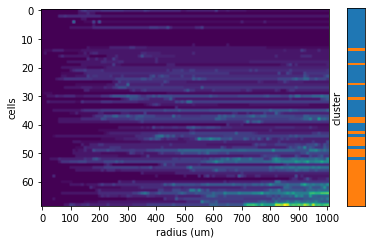

In [22]:
df = dendritic.plot_heatmap_with_column(plotDF, axon_sholl_df, col="cluster")

# Run Sholl analysis on axons, but instead of using 3D distance, use distance along axon wire length

In [23]:
graphs = axon.add_all_wire_lengths(dataDF, graphs)

In [24]:
axon_wire_sholl_df = dendritic.build_sholl_df(dataDF, graphs,analysis_type='axon',metric='wire_length')

In [25]:
axon_wire_sholl_df = pd.merge(
    axon_wire_sholl_df,
    plotDF[["Graph", "cluster"]],
    left_on="name",
    right_on="Graph",
    how="left",
)

In [26]:
axon_wire_bootstraps, axon_wire_summary = dendritic.bootstrap_groups(
    axon_wire_sholl_df, "cluster", 1000
    )

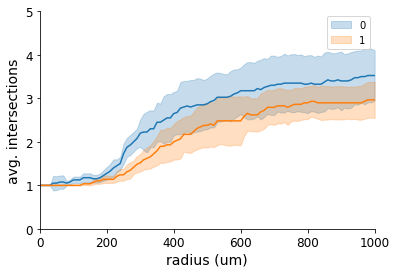

In [27]:
dendritic.plot_sholl_groups(
    axon_wire_sholl_df,
    "cluster",
    error="hierarchical bootstrap",
    bootstraps=axon_wire_summary,
    ylim_max=5
    )